In [1]:
import pandas as pd #for data processing
import numpy as np #for numerical operations
import seaborn as sns #for statistical visualization
import plotly.express as px #for statistical visualization
import matplotlib.pyplot as plt #for visualization
import scipy.stats as scp #for mathematical stats
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split

# EDA

In [2]:
eda = pd.read_csv('train.csv')

In [3]:
eda.matchup.value_counts()

TvP    202
TvZ    183
PvZ    162
PvP    142
TvT     74
ZvZ     66
Name: matchup, dtype: int64

In [4]:
eda.columns

Index(['id', 'played_at', 'tournament', 'map', 'game_length', 'winner',
       'matchup', 'p1_max_collection_rate', 'p2_max_collection_rate', 'p1_apm',
       'p2_apm', 'p1_spm', 'p2_spm', 'p1_workers_produced',
       'p2_workers_produced', 'p1_workers_killed', 'p2_workers_killed',
       'p1_workers_lost', 'p2_workers_lost', 'p1_supply_block',
       'p2_supply_block', 'p1_sq', 'p2_sq', 'p1_avg_pac_per_min',
       'p2_avg_pac_per_min', 'p1_avg_pac_action_latency',
       'p2_avg_pac_action_latency', 'p1_avg_pac_actions', 'p2_avg_pac_actions',
       'p1_avg_pac_gap', 'p2_avg_pac_gap', 'p1_avg_collection_rate_minerals',
       'p1_avg_unspent_minerals', 'p1_minerals_lost', 'p1_minerals_collected',
       'p2_avg_collection_rate_minerals', 'p2_avg_unspent_minerals',
       'p2_minerals_lost', 'p2_minerals_collected',
       'p1_avg_collection_rate_gas', 'p1_avg_unspent_gas', 'p1_gas_lost',
       'p1_gas_collected', 'p2_avg_collection_rate_gas', 'p2_avg_unspent_gas',
       'p2_gas_lo

In [5]:
eda

,id,played_at,tournament,map,game_length,winner,matchup,p1_max_collection_rate,p2_max_collection_rate,p1_apm,...,p1_avg_collection_rate_gas,p1_avg_unspent_gas,p1_gas_lost,p1_gas_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected,p1_race,p2_race
0,0205bd314da54b6fb363a998ca0c49ba,2022-02-25 03:01:50+00:00,IEM Katowice,2000 애트모스피어 - 래더,848,2,TvT,3778,3952,316,...,533.8,273.8,3436,6384,636.3,253.2,2864,7412,Terran,Terran
1,7ca6c874c8064364b4247780495fe4f2,2021-10-17 05:11:18+00:00,DH Masters Winter,Beckett Industries LE,612,1,PvZ,4344,3140,398,...,473.9,236.7,625,4265,427.4,201.3,850,3665,Zerg,Protoss
2,92ccfb1330424a4fb572585b8d6ea4c9,2021-10-10 01:50:23+00:00,DH Masters Winter,Beckett Industries LE,486,2,PvZ,3095,2944,389,...,226.5,157.6,800,1668,336.1,170.0,75,2436,Zerg,Protoss
3,d592c15de2a94b6aa5278b0fc241de54,2022-02-25 04:27:49+00:00,IEM Katowice,[ESL] Berlingrad,1078,2,PvZ,4064,4193,449,...,749.7,401.2,5850,11682,892.6,664.5,3850,13344,Protoss,Zerg
4,6a24b0487aef460a982d2ec930947c11,2021-12-15 19:17:24+00:00,DH Masters Last Chance,블랙번 - 래더,1001,1,PvZ,4484,4243,627,...,826.1,299.8,8975,11930,675.6,174.5,8200,10256,Zerg,Protoss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,bb13189cdb4c4d34bebc09f2546df46e,2022-01-13 22:58:13+00:00,DH Masters Last Chance,[TLMC15] Pride of Altaris,1059,1,ZvZ,3863,3471,471,...,561.1,243.5,4025,7971,446.9,147.0,4018,6423,Zerg,Zerg
825,3ee7eb14c106467683af88ae1bfda71b,2021-10-02 01:01:18+00:00,DH Masters Winter,Jagannatha LE,473,1,PvP,2754,2625,225,...,298.7,121.2,700,1939,332.4,129.8,600,2432,Protoss,Protoss
826,0065adb438824feb9e1ae15d41454797,2021-09-30 01:21:21+00:00,DH Masters Winter,Oxide LE,650,2,TvP,2860,3510,456,...,413.2,173.2,1900,3867,457.3,195.0,1250,4383,Terran,Protoss
827,e221451188444336a154949b8fe4ac33,2022-02-26 00:08:08+00:00,IEM Katowice,[ESL] Blackburn,881,1,PvZ,4613,3862,558,...,793.9,306.3,4100,10243,580.9,295.9,2925,8144,Zerg,Protoss


In [595]:
#Extract time played
eda['played_at'] = eda['played_at'].apply(lambda x: int(x.split()[1][:2]))

eda.loc[(eda.played_at < 6) & (eda.played_at >=0), 'played_at'] = 0 #pagi
eda.loc[(eda.played_at < 12) & (eda.played_at >=6), 'played_at'] = 1 #siang
eda.loc[(eda.played_at < 18) & (eda.played_at >=12), 'played_at'] = 2 #sore
eda.loc[(eda.played_at < 24) & (eda.played_at >=18), 'played_at'] = 3 #malam

In [596]:
eda.head()

,id,played_at,tournament,map,game_length,winner,matchup,p1_max_collection_rate,p2_max_collection_rate,p1_apm,...,p1_avg_collection_rate_gas,p1_avg_unspent_gas,p1_gas_lost,p1_gas_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected,p1_race,p2_race
0,0205bd314da54b6fb363a998ca0c49ba,0,IEM Katowice,2000 애트모스피어 - 래더,848,2,TvT,3778,3952,316,...,533.8,273.8,3436,6384,636.3,253.2,2864,7412,Terran,Terran
1,7ca6c874c8064364b4247780495fe4f2,0,DH Masters Winter,Beckett Industries LE,612,1,PvZ,4344,3140,398,...,473.9,236.7,625,4265,427.4,201.3,850,3665,Zerg,Protoss
2,92ccfb1330424a4fb572585b8d6ea4c9,0,DH Masters Winter,Beckett Industries LE,486,2,PvZ,3095,2944,389,...,226.5,157.6,800,1668,336.1,170.0,75,2436,Zerg,Protoss
3,d592c15de2a94b6aa5278b0fc241de54,0,IEM Katowice,[ESL] Berlingrad,1078,2,PvZ,4064,4193,449,...,749.7,401.2,5850,11682,892.6,664.5,3850,13344,Protoss,Zerg
4,6a24b0487aef460a982d2ec930947c11,3,DH Masters Last Chance,블랙번 - 래더,1001,1,PvZ,4484,4243,627,...,826.1,299.8,8975,11930,675.6,174.5,8200,10256,Zerg,Protoss


In [597]:
eda.tail()

,id,played_at,tournament,map,game_length,winner,matchup,p1_max_collection_rate,p2_max_collection_rate,p1_apm,...,p1_avg_collection_rate_gas,p1_avg_unspent_gas,p1_gas_lost,p1_gas_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected,p1_race,p2_race
824,bb13189cdb4c4d34bebc09f2546df46e,3,DH Masters Last Chance,[TLMC15] Pride of Altaris,1059,1,ZvZ,3863,3471,471,...,561.1,243.5,4025,7971,446.9,147.0,4018,6423,Zerg,Zerg
825,3ee7eb14c106467683af88ae1bfda71b,0,DH Masters Winter,Jagannatha LE,473,1,PvP,2754,2625,225,...,298.7,121.2,700,1939,332.4,129.8,600,2432,Protoss,Protoss
826,0065adb438824feb9e1ae15d41454797,0,DH Masters Winter,Oxide LE,650,2,TvP,2860,3510,456,...,413.2,173.2,1900,3867,457.3,195.0,1250,4383,Terran,Protoss
827,e221451188444336a154949b8fe4ac33,0,IEM Katowice,[ESL] Blackburn,881,1,PvZ,4613,3862,558,...,793.9,306.3,4100,10243,580.9,295.9,2925,8144,Zerg,Protoss
828,420ff58dc75e4647b2d4d268f04278a3,0,DH Masters Winter,Jagannatha LE,447,2,PvP,2014,2311,219,...,195.3,89.8,450,1252,269.3,128.7,225,1692,Protoss,Protoss


As we can see from the dataset above, sometime `matchup` column does not represented well in `p1_race` and `p2_race` ex: TvP -> p1_race: `Protoss` , p2_race: `Terran`. Now i will switch p1_ and p2_ value to make it representative with the matchup

I also noticed that the map is stored in different language, so i will translate them to english

In [598]:
eda['map'].replace(['블랙번 - 래더','[ESL] Blackburn','[TLMC14] Blackburn','黑色燃烧-天梯版','Blackburn EE'], 'Blackburn LE',inplace=True)
eda['map'].replace(['2000 애트모스피어 - 래더','Atmosphère 2\xa0000 EC','2000 атмосфер РВ','大气2000-天梯版'], '2000 Atmospheres LE',inplace=True)
eda['map'].replace(['하드와이어 - 래더','[ESL] Hardwire','하드와이어 - 래더','硬线-天梯版','[TLMC15] Hardwire'], 'Hardwire LE',inplace=True)
eda['map'].replace(['[ESL] Berlingrad','베를린그라드 - 래더','Berlingrad EC','[TLMC15] Berlingrad','Берлинград РВ','柏林加德-天梯版'], 'Berlingrad LE',inplace=True)
eda['map'].replace(['光影交错-天梯版'], 'Lightshade LE',inplace=True)
eda['map'].replace(['紫晶浪漫-天梯版'], 'Romanticide LE',inplace=True)
eda['map'].replace(['[ESL] Glittering Ashes','글리터링 애쉬즈 - 래더','[TLMC15] Glittering Ashes'], 'Glittering Ashes LE',inplace=True)
eda['map'].replace(['Mentes curiosas EE','큐리어스 마인즈 - 래더','[ESL] Curious Minds','[TLMC15] Curious Minds'], 'Curious Minds LE',inplace=True)
eda['map'].replace(['프라이드 오브 알타리스 - 래더','[TLMC15] Pride of Altaris','[ESL] Pride of Altaris'], 'Pride of Altaris LE',inplace=True)

In [599]:
eda.map.unique()

array(['2000 Atmospheres LE', 'Beckett Industries LE', 'Berlingrad LE',
       'Blackburn LE', 'Lightshade LE', 'Oxide LE', 'Hardwire LE',
       'Jagannatha LE', 'Glittering Ashes LE', 'Curious Minds LE',
       'Pride of Altaris LE', 'Romanticide LE', '锈化山巅-天梯版', '世界主宰-天梯版',
       '新奇之地-天梯版'], dtype=object)

we still have some untranslated map, i will drop them because the translation does not match with any map.

In [600]:
eda = eda[eda.map.isin(['锈化山巅-天梯版', '世界主宰-天梯版','新奇之地-天梯版']) == False]

Text(0.5, 1.0, 'Sebaran matchup')

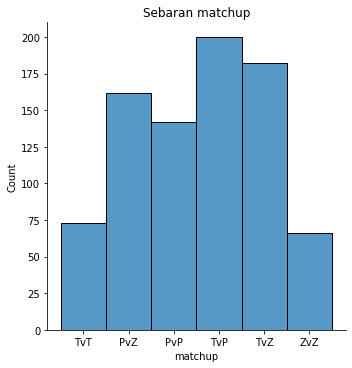

In [640]:
sns.displot(eda.matchup)
plt.title("Sebaran matchup")

In [602]:
tvp = eda[eda['matchup'] == 'TvP']
tvz = eda[eda['matchup'] == 'TvZ']
pvz = eda[eda['matchup'] == 'PvZ']
pvp = eda[eda['matchup'] == 'PvP']
zvz = eda[eda['matchup'] == 'ZvZ']
tvt = eda[eda['matchup'] == 'TvT']
tvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 6 to 826
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               200 non-null    object 
 1   played_at                        200 non-null    int64  
 2   tournament                       200 non-null    object 
 3   map                              200 non-null    object 
 4   game_length                      200 non-null    int64  
 5   winner                           200 non-null    int64  
 6   matchup                          200 non-null    object 
 7   p1_max_collection_rate           200 non-null    int64  
 8   p2_max_collection_rate           200 non-null    int64  
 9   p1_apm                           200 non-null    int64  
 10  p2_apm                           200 non-null    int64  
 11  p1_spm                           200 non-null    float64
 12  p2_spm                

In [603]:
def swap_columns(df, c1, c2):
    df['temp'] = df[c1]
    df[c1] = df[c2]
    df[c2] = df['temp']
    df.drop(columns=['temp'], inplace=True)

In [604]:
col1 = [c for c in eda.columns if c.lower()[:2] != 'p2']
col2 = [c for c in eda.columns if c.lower()[:2] != 'p1']
tmp1 = tvp[tvp['p1_race'] == 'Protoss']
tmp11 = tvp[tvp['p1_race'] == 'Terran']

print(tmp1.info())
for i in range(len(col1)):
    swap_columns(tmp1, col1[i], col2[i])
tmp1['winner'].replace([1,2],[2,1],inplace=True)
print(tmp1.info())


tmp2 = tvz[tvz['p1_race'] == 'Zerg']
tmp22 = tvz[tvz['p1_race'] == 'Terran']
print(tmp2.info())
for i in range(len(col1)):
    swap_columns(tmp2, col1[i], col2[i])
tmp2['winner'].replace([1,2],[2,1],inplace=True)
print(tmp2.info())

tmp3 = pvz[pvz['p1_race'] == 'Zerg']
tmp33 = pvz[pvz['p1_race'] == 'Protoss']
print(tmp3.info())
for i in range(len(col1)):
    swap_columns(tmp3, col1[i], col2[i])
tmp3['winner'].replace([1,2],[2,1],inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 6 to 813
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               94 non-null     object 
 1   played_at                        94 non-null     int64  
 2   tournament                       94 non-null     object 
 3   map                              94 non-null     object 
 4   game_length                      94 non-null     int64  
 5   winner                           94 non-null     int64  
 6   matchup                          94 non-null     object 
 7   p1_max_collection_rate           94 non-null     int64  
 8   p2_max_collection_rate           94 non-null     int64  
 9   p1_apm                           94 non-null     int64  
 10  p2_apm                           94 non-null     int64  
 11  p1_spm                           94 non-null     float64
 12  p2_spm                 

<ipython-input-603-9d0ee3f70e2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp'] = df[c1]
<ipython-input-603-9d0ee3f70e2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c1] = df[c2]
<ipython-input-603-9d0ee3f70e2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [605]:
frames = [tmp1, tmp2, tmp3, tmp11, tmp22, tmp33, pvp, tvt, zvz]
result = pd.concat(frames)

In [655]:
result.groupby('p1_race').median().transpose()

p1_race,Protoss,Terran,Zerg
played_at,0.000,1.00,3.00
game_length,628.000,725.00,481.00
winner,2.000,1.00,1.00
p1_max_collection_rate,3364.000,3750.00,2639.00
p2_max_collection_rate,3537.500,3762.00,2723.00
p1_apm,306.000,351.00,409.50
p2_apm,373.000,351.00,410.00
p1_spm,34.500,31.10,46.50
p2_spm,35.250,37.10,48.50
p1_workers_produced,70.000,74.00,57.50


In [656]:
eda.groupby('p2_race').median().transpose()

p2_race,Protoss,Terran,Zerg
played_at,1.000,1.00,1.000
game_length,615.500,709.00,682.000
winner,1.000,1.00,2.000
p1_max_collection_rate,3322.000,3728.00,3725.500
p2_max_collection_rate,3353.000,3790.00,3873.500
p1_apm,338.000,361.00,356.000
p2_apm,307.000,347.00,435.000
p1_spm,34.400,36.60,35.850
p2_spm,33.900,30.60,43.250
p1_workers_produced,69.000,85.00,77.000


# APM per matchup

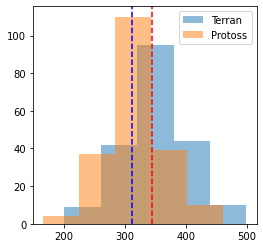

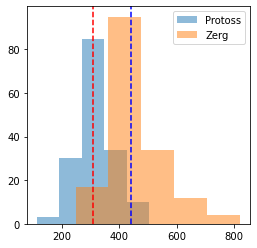

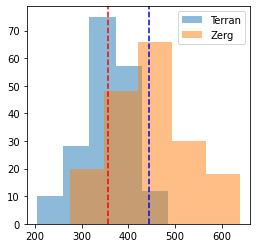

In [606]:
plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'TvP'],bins=5,alpha=0.5,label="Terran")
plt.hist(result.p2_apm[result.matchup == 'TvP'],bins=5,alpha=0.5,label="Protoss")
plt.axvline(result.p1_apm[result.matchup == 'TvP'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'TvP'].median(), color='b', linestyle='--')
plt.legend();
plt.show()


plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'PvZ'],bins=5,alpha=0.5,label="Protoss")
plt.hist(result.p2_apm[result.matchup == 'PvZ'],bins=5,alpha=0.5,label="Zerg")
plt.axvline(result.p1_apm[result.matchup == 'PvZ'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'PvZ'].median(), color='b', linestyle='--')
plt.legend();
plt.show()

plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'TvZ'],bins=5,alpha=0.5,label="Terran")
plt.hist(result.p2_apm[result.matchup == 'TvZ'],bins=5,alpha=0.5,label="Zerg")
plt.axvline(result.p1_apm[result.matchup == 'TvZ'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'TvZ'].median(), color='b', linestyle='--')
plt.legend();
plt.show()

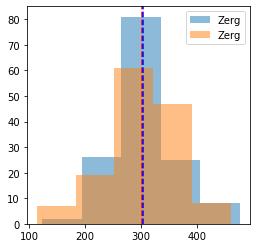

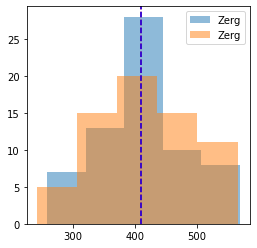

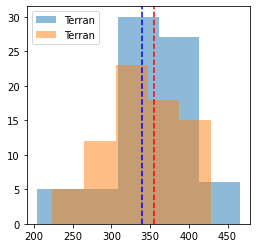

In [607]:
plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'PvP'],bins=5,alpha=0.5,label="Zerg")
plt.hist(result.p2_apm[result.matchup == 'PvP'],bins=5,alpha=0.5,label="Zerg")
plt.axvline(result.p1_apm[result.matchup == 'PvP'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'PvP'].median(), color='b', linestyle='--')
plt.legend();
plt.show()
plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'ZvZ'],bins=5,alpha=0.5,label="Zerg")
plt.hist(result.p2_apm[result.matchup == 'ZvZ'],bins=5,alpha=0.5,label="Zerg")
plt.axvline(result.p1_apm[result.matchup == 'ZvZ'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'ZvZ'].median(), color='b', linestyle='--')
plt.legend();
plt.show()
plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'TvT'],bins=5,alpha=0.5,label="Terran")
plt.hist(result.p2_apm[result.matchup == 'TvT'],bins=5,alpha=0.5,label="Terran")
plt.axvline(result.p1_apm[result.matchup == 'TvT'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'TvT'].median(), color='b', linestyle='--')
plt.legend();
plt.show()

# Does having higher APM translate to a win?

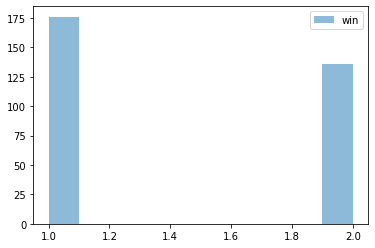

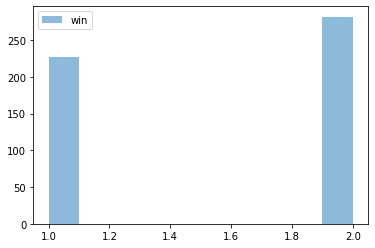

1.0 2.0


In [608]:
high_apm1 = result[(result['p1_apm']) > (result['p2_apm'])]
plt.hist(high_apm1.winner,alpha=0.5,label="win")
plt.legend();
plt.show()

high_apm2 = result[(result['p2_apm']) > (result['p1_apm'])]
plt.hist(high_apm2.winner,alpha=0.5,label="win")
plt.legend();
plt.show()
print(high_apm1.winner.median(),high_apm2.winner.median())


As we can see from the diagram above, having higher APM or playing more aggresive will give you higher chance of winning.

# Does using a certain race will give you a better chance of winning?

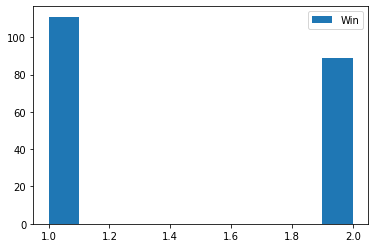

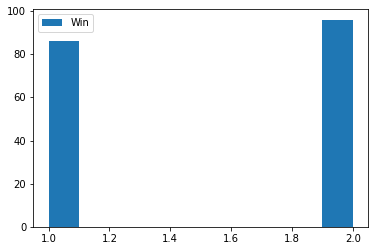

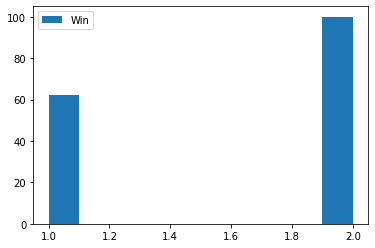

In [609]:
# plt.figure(figsize=(4,4))
# plt.bar(result.matchup, result.winner)
# plt.show()

plt.hist(result.winner[result.matchup == 'TvP'],label="Win")
plt.legend();
plt.show()


plt.hist(result.winner[result.matchup == 'TvZ'],label="Win")
plt.legend();
plt.show()

plt.hist(result.winner[result.matchup == 'PvZ'],label="Win")
plt.legend();
plt.show()




As we can see, using `Zerg` race will give you higher chance of winning

# Which map is used most frequent?

<AxesSubplot:>

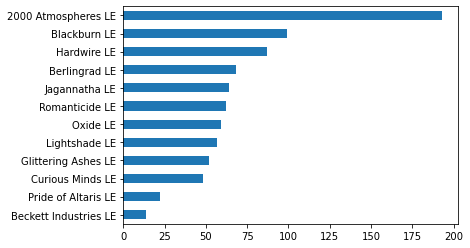

In [610]:
eda.map.value_counts().sort_values().plot(kind = 'barh')

From the bar above we can see that `2000 Atmospheres LE` is used the most, but is it the same for each `matchup`?

<AxesSubplot:>

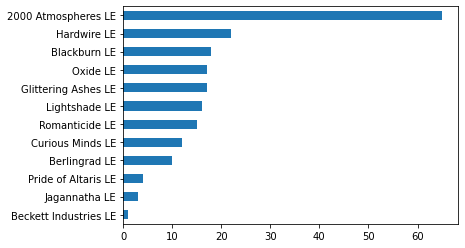

In [611]:
tvp.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

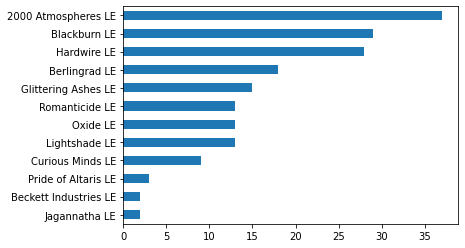

In [612]:
tvz.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

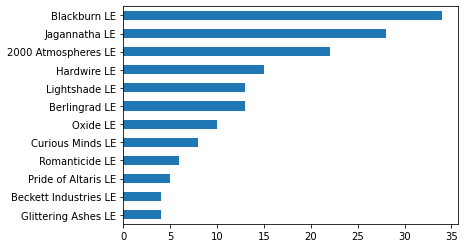

In [613]:
pvz.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

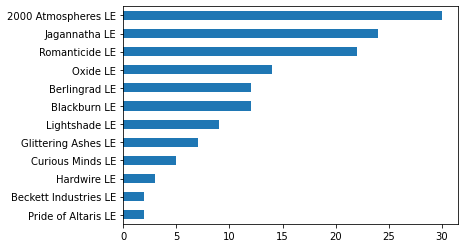

In [614]:
pvp.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

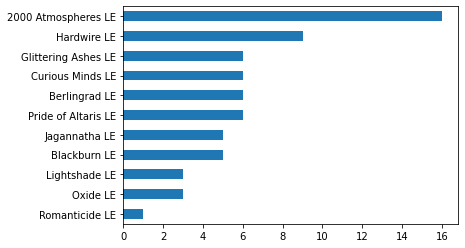

In [615]:
zvz.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

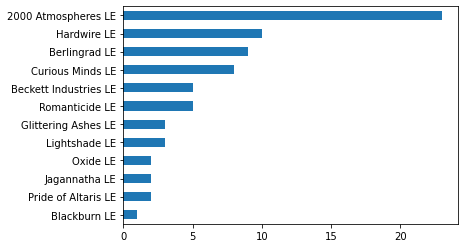

In [616]:
tvt.map.value_counts().sort_values().plot(kind = 'barh')

Only `PvZ` uses `Blackburn LE` more frequent than `2000 Atmospheres LE`

# At what time does a match happen?

Text(0.5, 1.0, 'Sebaran waktu penyelenggaraan match')

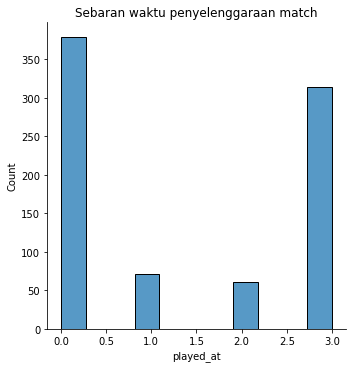

In [618]:
sns.displot(eda.played_at)
plt.title("Sebaran waktu penyelenggaraan match")

As we can see, the matchup usually happen in the morning or at night

===============================================================================

In [620]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [621]:
df_train

,id,played_at,tournament,map,game_length,winner,matchup,p1_max_collection_rate,p2_max_collection_rate,p1_apm,...,p1_avg_collection_rate_gas,p1_avg_unspent_gas,p1_gas_lost,p1_gas_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected,p1_race,p2_race
0,0205bd314da54b6fb363a998ca0c49ba,2022-02-25 03:01:50+00:00,IEM Katowice,2000 애트모스피어 - 래더,848,2,TvT,3778,3952,316,...,533.8,273.8,3436,6384,636.3,253.2,2864,7412,Terran,Terran
1,7ca6c874c8064364b4247780495fe4f2,2021-10-17 05:11:18+00:00,DH Masters Winter,Beckett Industries LE,612,1,PvZ,4344,3140,398,...,473.9,236.7,625,4265,427.4,201.3,850,3665,Zerg,Protoss
2,92ccfb1330424a4fb572585b8d6ea4c9,2021-10-10 01:50:23+00:00,DH Masters Winter,Beckett Industries LE,486,2,PvZ,3095,2944,389,...,226.5,157.6,800,1668,336.1,170.0,75,2436,Zerg,Protoss
3,d592c15de2a94b6aa5278b0fc241de54,2022-02-25 04:27:49+00:00,IEM Katowice,[ESL] Berlingrad,1078,2,PvZ,4064,4193,449,...,749.7,401.2,5850,11682,892.6,664.5,3850,13344,Protoss,Zerg
4,6a24b0487aef460a982d2ec930947c11,2021-12-15 19:17:24+00:00,DH Masters Last Chance,블랙번 - 래더,1001,1,PvZ,4484,4243,627,...,826.1,299.8,8975,11930,675.6,174.5,8200,10256,Zerg,Protoss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,bb13189cdb4c4d34bebc09f2546df46e,2022-01-13 22:58:13+00:00,DH Masters Last Chance,[TLMC15] Pride of Altaris,1059,1,ZvZ,3863,3471,471,...,561.1,243.5,4025,7971,446.9,147.0,4018,6423,Zerg,Zerg
825,3ee7eb14c106467683af88ae1bfda71b,2021-10-02 01:01:18+00:00,DH Masters Winter,Jagannatha LE,473,1,PvP,2754,2625,225,...,298.7,121.2,700,1939,332.4,129.8,600,2432,Protoss,Protoss
826,0065adb438824feb9e1ae15d41454797,2021-09-30 01:21:21+00:00,DH Masters Winter,Oxide LE,650,2,TvP,2860,3510,456,...,413.2,173.2,1900,3867,457.3,195.0,1250,4383,Terran,Protoss
827,e221451188444336a154949b8fe4ac33,2022-02-26 00:08:08+00:00,IEM Katowice,[ESL] Blackburn,881,1,PvZ,4613,3862,558,...,793.9,306.3,4100,10243,580.9,295.9,2925,8144,Zerg,Protoss


In [622]:
df_train['played_at'] = df_train['played_at'].apply(lambda x: int(x.split()[1][:2]))
df_test['played_at'] = df_test['played_at'].apply(lambda x: int(x.split()[1][:2]))

In [623]:
df_train['map'].replace(['블랙번 - 래더','[ESL] Blackburn','[TLMC14] Blackburn','黑色燃烧-天梯版','Blackburn EE'], 'Blackburn LE',inplace=True)
df_train['map'].replace(['2000 애트모스피어 - 래더','Atmosphère 2\xa0000 EC','2000 атмосфер РВ','大气2000-天梯版'], '2000 Atmospheres LE',inplace=True)
df_train['map'].replace(['하드와이어 - 래더','[ESL] Hardwire','하드와이어 - 래더','硬线-天梯版','[TLMC15] Hardwire'], 'Hardwire LE',inplace=True)
df_train['map'].replace(['[ESL] Berlingrad','베를린그라드 - 래더','Berlingrad EC','[TLMC15] Berlingrad','Берлинград РВ','柏林加德-天梯版'], 'Berlingrad LE',inplace=True)
df_train['map'].replace(['光影交错-天梯版'], 'Lightshade LE',inplace=True)
df_train['map'].replace(['紫晶浪漫-天梯版'], 'Romanticide LE',inplace=True)
df_train['map'].replace(['[ESL] Glittering Ashes','글리터링 애쉬즈 - 래더','[TLMC15] Glittering Ashes'], 'Glittering Ashes LE',inplace=True)
df_train['map'].replace(['Mentes curiosas EE','큐리어스 마인즈 - 래더','[ESL] Curious Minds','[TLMC15] Curious Minds'], 'Curious Minds LE',inplace=True)
df_train['map'].replace(['프라이드 오브 알타리스 - 래더','[TLMC15] Pride of Altaris','[ESL] Pride of Altaris'], 'Pride of Altaris LE',inplace=True)

In [624]:
df_train['map'].unique()

array(['2000 Atmospheres LE', 'Beckett Industries LE', 'Berlingrad LE',
       'Blackburn LE', 'Lightshade LE', 'Oxide LE', 'Hardwire LE',
       'Jagannatha LE', 'Glittering Ashes LE', 'Curious Minds LE',
       'Pride of Altaris LE', 'Romanticide LE', '锈化山巅-天梯版', '世界主宰-天梯版',
       '新奇之地-天梯版'], dtype=object)

In [625]:
df_test['map'].replace(['블랙번 - 래더','[ESL] Blackburn','[TLMC14] Blackburn','黑色燃烧-天梯版','Blackburn EE'], 'Blackburn LE',inplace=True)
df_test['map'].replace(['2000 애트모스피어 - 래더','Atmosphère 2\xa0000 EC','2000 атмосфер РВ','大气2000-天梯版'], '2000 Atmospheres LE',inplace=True)
df_test['map'].replace(['하드와이어 - 래더','[ESL] Hardwire','하드와이어 - 래더','硬线-天梯版','[TLMC15] Hardwire'], 'Hardwire LE',inplace=True)
df_test['map'].replace(['[ESL] Berlingrad','베를린그라드 - 래더','Berlingrad EC','[TLMC15] Berlingrad','Берлинград РВ','柏林加德-天梯版'], 'Berlingrad LE',inplace=True)
df_test['map'].replace(['光影交错-天梯版'], 'Lightshade LE',inplace=True)
df_test['map'].replace(['紫晶浪漫-天梯版'], 'Romanticide LE',inplace=True)
df_test['map'].replace(['[ESL] Glittering Ashes','글리터링 애쉬즈 - 래더','[TLMC15] Glittering Ashes'], 'Glittering Ashes LE',inplace=True)
df_test['map'].replace(['Mentes curiosas EE','큐리어스 마인즈 - 래더','[ESL] Curious Minds','[TLMC15] Curious Minds'], 'Curious Minds LE',inplace=True)
df_test['map'].replace(['프라이드 오브 알타리스 - 래더','[TLMC15] Pride of Altaris','[ESL] Pride of Altaris'], 'Pride of Altaris LE',inplace=True)
df_test['map'].replace(['贝克特工业-天梯版'], 'Beckett Industries LE',inplace=True)

In [626]:
df_test['map'].unique()

array(['2000 Atmospheres LE', 'Lightshade LE', 'Blackburn LE',
       'Beckett Industries LE', 'Jagannatha LE', 'Glittering Ashes LE',
       'Berlingrad LE', 'Hardwire LE', 'Oxide LE', 'Curious Minds LE',
       'Romanticide LE', 'Pride of Altaris LE', '闪烬平原-天梯版', '锈化山巅-天梯版',
       '世界主宰-天梯版'], dtype=object)

In [627]:
x = pd.concat([df_train['map'],df_test['map']])

In [628]:
cols = [c for c in df_train.columns if c.lower()[:2] != 'p2']
colst = [c for c in df_test.columns if c.lower()[:2] != 'p2']
p1_ = df_train[cols]
p1_t = df_test[colst]

cols = [c for c in df_train.columns if c.lower()[:2] != 'p1']
colst = [c for c in df_test.columns if c.lower()[:2] != 'p1']

p2_ = df_train[cols]
p2_t = df_test[colst]

set_map = set()
for i in x:
    set_map.add(i)
lst_maps = list(set_map)

set_tour = set()
for i in p1_['tournament']:
    set_tour.add(i)
lst_tour = list(set_tour)

set_race = set()
for i in df_train['p1_race']:
    set_race.add(i)
lst_race = list(set_race)



maps = {element: lst_maps.index(element) for element in lst_maps}
tour = {element: lst_tour.index(element) for element in lst_tour}
race = {element: lst_race.index(element) for element in lst_race}

p1_.replace(maps,inplace=True)
p1_.replace(tour,inplace=True)

p1_t.replace(maps,inplace=True)
p1_t.replace(tour,inplace=True)

p2_.replace(maps,inplace=True)
p2_.replace(tour,inplace=True)

p2_t.replace(maps,inplace=True)
p2_t.replace(tour,inplace=True)


p1_ = p1_.drop(['id','matchup',],axis=1)
p1_t = p1_t.drop(['id'],axis=1)

p2_ = p2_.drop(['id','matchup',],axis=1)
p2_t = p2_t.drop(['id'],axis=1)

df_train.drop(['id'],axis=1,inplace=True)


testt = df_test['id']

df_test.drop(['id'],axis=1,inplace=True)

df_train.replace(maps,inplace=True)
df_train.replace(race,inplace=True)
df_train.replace(tour,inplace=True)

df_test.replace(maps,inplace=True)

df_test.replace(tour,inplace=True)

/Users/aryafchandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [629]:
y = df_train['matchup']

In [630]:
#Classify Race
X = p1_.drop('p1_race', axis=1)
Y = p1_['p1_race']


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=50)
X_train

Z = p2_.drop('p2_race', axis=1)
A = p2_['p2_race']


z_train, z_test, a_train, a_test = train_test_split(Z,A,test_size=.2,random_state=50)
z_train

,played_at,tournament,map,game_length,winner,p2_max_collection_rate,p2_apm,p2_spm,p2_workers_produced,p2_workers_killed,...,p2_avg_pac_actions,p2_avg_pac_gap,p2_avg_collection_rate_minerals,p2_avg_unspent_minerals,p2_minerals_lost,p2_minerals_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected
573,23,0,4,214,2,867,424,14.8,15,20,...,26.17,0.17,372.8,121.5,375,2410,0.0,0.0,0,0
681,22,2,13,859,1,4086,341,17.3,66,53,...,7.08,0.06,2122.4,242.5,17225,29725,475.1,270.9,3150,5441
558,0,0,12,883,1,5290,356,24.4,85,37,...,7.85,0.06,2175.4,274.2,12500,30470,739.4,241.6,5325,8976
331,5,0,6,716,1,3986,394,15.2,98,6,...,11.72,0.05,1731.1,266.4,6875,21295,436.9,210.7,2200,4732
538,1,0,2,438,1,1314,421,12.4,24,2,...,13.44,0.02,789.9,140.7,1050,6635,241.1,154.7,550,1576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,1,7,553,2,2888,415,39.9,73,51,...,10.65,0.06,1267.7,198.7,1681,12507,357.8,160.2,531,3079
289,20,0,6,693,1,3655,284,47.2,78,4,...,6.26,0.10,1665.7,294.1,7225,19730,442.4,185.1,3275,4556
109,19,2,14,569,1,2429,323,35.5,55,1,...,6.09,0.06,1245.5,200.9,2950,12050,315.6,206.6,650,2430
480,11,1,13,860,2,4686,534,31.9,112,49,...,11.07,0.09,2148.3,293.7,15900,30685,632.3,371.6,5375,8286


In [631]:
model1 = CatBoostClassifier()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_train)
Y_pred = model1.predict(X_test)

acc = model1.score(X_train, y_train)
Acc = model1.score(X_test, y_test)

test_1 = model1.predict(p1_t)


print("Data train accuracy:", acc)
print("Data test accuracy:", Acc)

Learning rate set to 0.077485
0:	learn: 1.0715216	total: 21.8ms	remaining: 21.8s
1:	learn: 1.0413557	total: 24.9ms	remaining: 12.4s
2:	learn: 1.0163576	total: 29.6ms	remaining: 9.82s
3:	learn: 0.9838679	total: 33.9ms	remaining: 8.45s
4:	learn: 0.9622168	total: 37.3ms	remaining: 7.42s
5:	learn: 0.9413732	total: 40.9ms	remaining: 6.78s
6:	learn: 0.9198578	total: 44.2ms	remaining: 6.27s
7:	learn: 0.8960628	total: 47.8ms	remaining: 5.92s
8:	learn: 0.8762161	total: 51.6ms	remaining: 5.68s
9:	learn: 0.8582993	total: 55.2ms	remaining: 5.47s
10:	learn: 0.8388058	total: 58.6ms	remaining: 5.27s
11:	learn: 0.8232533	total: 61.9ms	remaining: 5.1s
12:	learn: 0.8097367	total: 65.5ms	remaining: 4.97s
13:	learn: 0.7964616	total: 69ms	remaining: 4.86s
14:	learn: 0.7803311	total: 72.5ms	remaining: 4.76s
15:	learn: 0.7673139	total: 76.4ms	remaining: 4.7s
16:	learn: 0.7543159	total: 79.9ms	remaining: 4.62s
17:	learn: 0.7409830	total: 83.4ms	remaining: 4.55s
18:	learn: 0.7313942	total: 86.5ms	remaining: 4.

204:	learn: 0.1912087	total: 754ms	remaining: 2.92s
205:	learn: 0.1904256	total: 757ms	remaining: 2.92s
206:	learn: 0.1893910	total: 761ms	remaining: 2.91s
207:	learn: 0.1887300	total: 764ms	remaining: 2.91s
208:	learn: 0.1872002	total: 768ms	remaining: 2.9s
209:	learn: 0.1862277	total: 772ms	remaining: 2.9s
210:	learn: 0.1851959	total: 776ms	remaining: 2.9s
211:	learn: 0.1841918	total: 780ms	remaining: 2.9s
212:	learn: 0.1831497	total: 784ms	remaining: 2.9s
213:	learn: 0.1822966	total: 789ms	remaining: 2.9s
214:	learn: 0.1816035	total: 792ms	remaining: 2.89s
215:	learn: 0.1804462	total: 796ms	remaining: 2.89s
216:	learn: 0.1796012	total: 799ms	remaining: 2.88s
217:	learn: 0.1789815	total: 803ms	remaining: 2.88s
218:	learn: 0.1777963	total: 806ms	remaining: 2.87s
219:	learn: 0.1768816	total: 810ms	remaining: 2.87s
220:	learn: 0.1762740	total: 813ms	remaining: 2.87s
221:	learn: 0.1754157	total: 816ms	remaining: 2.86s
222:	learn: 0.1745104	total: 820ms	remaining: 2.86s
223:	learn: 0.1738

407:	learn: 0.0887205	total: 1.51s	remaining: 2.19s
408:	learn: 0.0885328	total: 1.51s	remaining: 2.18s
409:	learn: 0.0882296	total: 1.51s	remaining: 2.18s
410:	learn: 0.0879354	total: 1.52s	remaining: 2.18s
411:	learn: 0.0876569	total: 1.52s	remaining: 2.17s
412:	learn: 0.0872091	total: 1.52s	remaining: 2.17s
413:	learn: 0.0869553	total: 1.53s	remaining: 2.16s
414:	learn: 0.0867680	total: 1.53s	remaining: 2.16s
415:	learn: 0.0865234	total: 1.53s	remaining: 2.15s
416:	learn: 0.0862369	total: 1.54s	remaining: 2.15s
417:	learn: 0.0858204	total: 1.54s	remaining: 2.15s
418:	learn: 0.0854391	total: 1.55s	remaining: 2.15s
419:	learn: 0.0851712	total: 1.55s	remaining: 2.14s
420:	learn: 0.0849566	total: 1.55s	remaining: 2.14s
421:	learn: 0.0847202	total: 1.56s	remaining: 2.13s
422:	learn: 0.0844828	total: 1.56s	remaining: 2.13s
423:	learn: 0.0840082	total: 1.56s	remaining: 2.13s
424:	learn: 0.0836452	total: 1.57s	remaining: 2.12s
425:	learn: 0.0833971	total: 1.57s	remaining: 2.12s
426:	learn: 

570:	learn: 0.0569437	total: 2.07s	remaining: 1.56s
571:	learn: 0.0568447	total: 2.08s	remaining: 1.55s
572:	learn: 0.0567359	total: 2.08s	remaining: 1.55s
573:	learn: 0.0565563	total: 2.08s	remaining: 1.55s
574:	learn: 0.0564167	total: 2.09s	remaining: 1.54s
575:	learn: 0.0562573	total: 2.09s	remaining: 1.54s
576:	learn: 0.0561125	total: 2.09s	remaining: 1.53s
577:	learn: 0.0560294	total: 2.1s	remaining: 1.53s
578:	learn: 0.0558719	total: 2.1s	remaining: 1.53s
579:	learn: 0.0557334	total: 2.1s	remaining: 1.52s
580:	learn: 0.0556252	total: 2.11s	remaining: 1.52s
581:	learn: 0.0555373	total: 2.11s	remaining: 1.52s
582:	learn: 0.0553745	total: 2.12s	remaining: 1.51s
583:	learn: 0.0552477	total: 2.12s	remaining: 1.51s
584:	learn: 0.0551379	total: 2.13s	remaining: 1.51s
585:	learn: 0.0548597	total: 2.13s	remaining: 1.5s
586:	learn: 0.0547657	total: 2.13s	remaining: 1.5s
587:	learn: 0.0547190	total: 2.14s	remaining: 1.5s
588:	learn: 0.0545404	total: 2.14s	remaining: 1.49s
589:	learn: 0.0544

729:	learn: 0.0409645	total: 2.64s	remaining: 977ms
730:	learn: 0.0408981	total: 2.64s	remaining: 973ms
731:	learn: 0.0408334	total: 2.65s	remaining: 970ms
732:	learn: 0.0407693	total: 2.65s	remaining: 966ms
733:	learn: 0.0406870	total: 2.66s	remaining: 963ms
734:	learn: 0.0406159	total: 2.66s	remaining: 959ms
735:	learn: 0.0405289	total: 2.66s	remaining: 956ms
736:	learn: 0.0404693	total: 2.67s	remaining: 952ms
737:	learn: 0.0403835	total: 2.67s	remaining: 949ms
738:	learn: 0.0402812	total: 2.67s	remaining: 945ms
739:	learn: 0.0402064	total: 2.68s	remaining: 941ms
740:	learn: 0.0401394	total: 2.68s	remaining: 938ms
741:	learn: 0.0400689	total: 2.69s	remaining: 935ms
742:	learn: 0.0399926	total: 2.69s	remaining: 931ms
743:	learn: 0.0399205	total: 2.69s	remaining: 927ms
744:	learn: 0.0398655	total: 2.7s	remaining: 924ms
745:	learn: 0.0398134	total: 2.7s	remaining: 920ms
746:	learn: 0.0397539	total: 2.7s	remaining: 916ms
747:	learn: 0.0396993	total: 2.71s	remaining: 913ms
748:	learn: 0.0

890:	learn: 0.0309649	total: 3.21s	remaining: 392ms
891:	learn: 0.0309314	total: 3.21s	remaining: 389ms
892:	learn: 0.0308731	total: 3.21s	remaining: 385ms
893:	learn: 0.0308225	total: 3.22s	remaining: 381ms
894:	learn: 0.0307842	total: 3.22s	remaining: 378ms
895:	learn: 0.0307202	total: 3.22s	remaining: 374ms
896:	learn: 0.0306394	total: 3.23s	remaining: 371ms
897:	learn: 0.0305883	total: 3.23s	remaining: 367ms
898:	learn: 0.0305067	total: 3.23s	remaining: 364ms
899:	learn: 0.0304785	total: 3.24s	remaining: 360ms
900:	learn: 0.0304536	total: 3.24s	remaining: 356ms
901:	learn: 0.0304139	total: 3.25s	remaining: 353ms
902:	learn: 0.0303755	total: 3.25s	remaining: 349ms
903:	learn: 0.0303312	total: 3.25s	remaining: 345ms
904:	learn: 0.0303140	total: 3.26s	remaining: 342ms
905:	learn: 0.0302784	total: 3.26s	remaining: 338ms
906:	learn: 0.0302355	total: 3.26s	remaining: 335ms
907:	learn: 0.0301765	total: 3.27s	remaining: 331ms
908:	learn: 0.0301351	total: 3.27s	remaining: 327ms
909:	learn: 

In [632]:
model2 = CatBoostClassifier()
model2.fit(z_train, a_train)

y_pred = model2.predict(z_train)
Y_pred = model2.predict(z_test)

acc = model2.score(z_train, a_train)
Acc = model2.score(z_test, a_test)

test_2 = model2.predict(p2_t)


print("Data train accuracy:", acc)
print("Data test accuracy:", Acc)

Learning rate set to 0.077485
0:	learn: 1.0666119	total: 13.6ms	remaining: 13.6s
1:	learn: 1.0373161	total: 16.5ms	remaining: 8.25s
2:	learn: 1.0106334	total: 19.3ms	remaining: 6.42s
3:	learn: 0.9854372	total: 22.5ms	remaining: 5.6s
4:	learn: 0.9624884	total: 25.6ms	remaining: 5.08s
5:	learn: 0.9407167	total: 28.5ms	remaining: 4.72s
6:	learn: 0.9209865	total: 31.9ms	remaining: 4.53s
7:	learn: 0.8996942	total: 34.9ms	remaining: 4.33s
8:	learn: 0.8862049	total: 38ms	remaining: 4.18s
9:	learn: 0.8702742	total: 41.2ms	remaining: 4.08s
10:	learn: 0.8573111	total: 44.2ms	remaining: 3.98s
11:	learn: 0.8428170	total: 47.2ms	remaining: 3.88s
12:	learn: 0.8274644	total: 50.9ms	remaining: 3.87s
13:	learn: 0.8170323	total: 54.3ms	remaining: 3.82s
14:	learn: 0.8028838	total: 58ms	remaining: 3.81s
15:	learn: 0.7907311	total: 61.4ms	remaining: 3.78s
16:	learn: 0.7798575	total: 65ms	remaining: 3.75s
17:	learn: 0.7680792	total: 68.6ms	remaining: 3.74s
18:	learn: 0.7552460	total: 72.6ms	remaining: 3.75s

165:	learn: 0.2417274	total: 621ms	remaining: 3.12s
166:	learn: 0.2406776	total: 625ms	remaining: 3.12s
167:	learn: 0.2397766	total: 628ms	remaining: 3.11s
168:	learn: 0.2386349	total: 632ms	remaining: 3.11s
169:	learn: 0.2372862	total: 635ms	remaining: 3.1s
170:	learn: 0.2361000	total: 639ms	remaining: 3.1s
171:	learn: 0.2351689	total: 642ms	remaining: 3.09s
172:	learn: 0.2338462	total: 646ms	remaining: 3.09s
173:	learn: 0.2329843	total: 649ms	remaining: 3.08s
174:	learn: 0.2317468	total: 653ms	remaining: 3.08s
175:	learn: 0.2302178	total: 657ms	remaining: 3.08s
176:	learn: 0.2293479	total: 660ms	remaining: 3.07s
177:	learn: 0.2280143	total: 663ms	remaining: 3.06s
178:	learn: 0.2267635	total: 667ms	remaining: 3.06s
179:	learn: 0.2254688	total: 671ms	remaining: 3.06s
180:	learn: 0.2245390	total: 674ms	remaining: 3.05s
181:	learn: 0.2230302	total: 677ms	remaining: 3.04s
182:	learn: 0.2218103	total: 680ms	remaining: 3.04s
183:	learn: 0.2200336	total: 683ms	remaining: 3.03s
184:	learn: 0.

330:	learn: 0.1168096	total: 1.18s	remaining: 2.39s
331:	learn: 0.1163316	total: 1.19s	remaining: 2.39s
332:	learn: 0.1159761	total: 1.19s	remaining: 2.39s
333:	learn: 0.1154689	total: 1.2s	remaining: 2.38s
334:	learn: 0.1150535	total: 1.2s	remaining: 2.38s
335:	learn: 0.1143982	total: 1.2s	remaining: 2.38s
336:	learn: 0.1141487	total: 1.21s	remaining: 2.37s
337:	learn: 0.1137134	total: 1.21s	remaining: 2.37s
338:	learn: 0.1134929	total: 1.21s	remaining: 2.37s
339:	learn: 0.1130276	total: 1.22s	remaining: 2.36s
340:	learn: 0.1128420	total: 1.22s	remaining: 2.36s
341:	learn: 0.1124533	total: 1.22s	remaining: 2.35s
342:	learn: 0.1121476	total: 1.23s	remaining: 2.35s
343:	learn: 0.1117506	total: 1.23s	remaining: 2.35s
344:	learn: 0.1113906	total: 1.23s	remaining: 2.34s
345:	learn: 0.1109245	total: 1.24s	remaining: 2.34s
346:	learn: 0.1107884	total: 1.24s	remaining: 2.33s
347:	learn: 0.1103574	total: 1.24s	remaining: 2.33s
348:	learn: 0.1099471	total: 1.25s	remaining: 2.33s
349:	learn: 0.1

518:	learn: 0.0660554	total: 1.87s	remaining: 1.73s
519:	learn: 0.0659227	total: 1.87s	remaining: 1.73s
520:	learn: 0.0657504	total: 1.88s	remaining: 1.72s
521:	learn: 0.0654771	total: 1.88s	remaining: 1.72s
522:	learn: 0.0652829	total: 1.88s	remaining: 1.72s
523:	learn: 0.0651558	total: 1.89s	remaining: 1.71s
524:	learn: 0.0649605	total: 1.89s	remaining: 1.71s
525:	learn: 0.0647771	total: 1.89s	remaining: 1.71s
526:	learn: 0.0646381	total: 1.9s	remaining: 1.7s
527:	learn: 0.0643541	total: 1.9s	remaining: 1.7s
528:	learn: 0.0642834	total: 1.9s	remaining: 1.7s
529:	learn: 0.0641798	total: 1.91s	remaining: 1.69s
530:	learn: 0.0639369	total: 1.91s	remaining: 1.69s
531:	learn: 0.0637368	total: 1.91s	remaining: 1.68s
532:	learn: 0.0635784	total: 1.92s	remaining: 1.68s
533:	learn: 0.0634611	total: 1.92s	remaining: 1.68s
534:	learn: 0.0633274	total: 1.92s	remaining: 1.67s
535:	learn: 0.0631984	total: 1.93s	remaining: 1.67s
536:	learn: 0.0629722	total: 1.93s	remaining: 1.66s
537:	learn: 0.0628

678:	learn: 0.0458942	total: 2.44s	remaining: 1.15s
679:	learn: 0.0457813	total: 2.44s	remaining: 1.15s
680:	learn: 0.0457116	total: 2.45s	remaining: 1.15s
681:	learn: 0.0456354	total: 2.45s	remaining: 1.14s
682:	learn: 0.0455442	total: 2.46s	remaining: 1.14s
683:	learn: 0.0454388	total: 2.46s	remaining: 1.14s
684:	learn: 0.0453585	total: 2.46s	remaining: 1.13s
685:	learn: 0.0451727	total: 2.47s	remaining: 1.13s
686:	learn: 0.0450985	total: 2.47s	remaining: 1.13s
687:	learn: 0.0450497	total: 2.47s	remaining: 1.12s
688:	learn: 0.0449912	total: 2.48s	remaining: 1.12s
689:	learn: 0.0448639	total: 2.48s	remaining: 1.11s
690:	learn: 0.0447847	total: 2.49s	remaining: 1.11s
691:	learn: 0.0446912	total: 2.49s	remaining: 1.11s
692:	learn: 0.0446126	total: 2.49s	remaining: 1.1s
693:	learn: 0.0445564	total: 2.5s	remaining: 1.1s
694:	learn: 0.0444785	total: 2.5s	remaining: 1.1s
695:	learn: 0.0444111	total: 2.5s	remaining: 1.09s
696:	learn: 0.0443105	total: 2.51s	remaining: 1.09s
697:	learn: 0.0442

845:	learn: 0.0341553	total: 3s	remaining: 546ms
846:	learn: 0.0341106	total: 3s	remaining: 543ms
847:	learn: 0.0340366	total: 3.01s	remaining: 539ms
848:	learn: 0.0340082	total: 3.01s	remaining: 536ms
849:	learn: 0.0339792	total: 3.02s	remaining: 532ms
850:	learn: 0.0339388	total: 3.02s	remaining: 529ms
851:	learn: 0.0338782	total: 3.02s	remaining: 525ms
852:	learn: 0.0338281	total: 3.03s	remaining: 522ms
853:	learn: 0.0337880	total: 3.03s	remaining: 518ms
854:	learn: 0.0337321	total: 3.04s	remaining: 515ms
855:	learn: 0.0336544	total: 3.04s	remaining: 511ms
856:	learn: 0.0335960	total: 3.04s	remaining: 508ms
857:	learn: 0.0335785	total: 3.04s	remaining: 504ms
858:	learn: 0.0335120	total: 3.05s	remaining: 500ms
859:	learn: 0.0334814	total: 3.05s	remaining: 497ms
860:	learn: 0.0333990	total: 3.05s	remaining: 493ms
861:	learn: 0.0333653	total: 3.06s	remaining: 490ms
862:	learn: 0.0333237	total: 3.06s	remaining: 486ms
863:	learn: 0.0332783	total: 3.06s	remaining: 482ms
864:	learn: 0.0332

In [633]:
df_test['p1_race'] = test_1
df_test['p2_race'] = test_2
df_test.replace(race,inplace=True)

In [634]:
#Classify matchup
X = df_train.drop('matchup', axis=1)
Y = df_train['matchup']


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=50)
X_train

,played_at,tournament,map,game_length,winner,p1_max_collection_rate,p2_max_collection_rate,p1_apm,p2_apm,p1_spm,...,p1_avg_collection_rate_gas,p1_avg_unspent_gas,p1_gas_lost,p1_gas_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected,p1_race,p2_race
573,23,0,4,214,2,1051,867,341,424,46.4,...,17.8,38.5,0,68,0.0,0.0,0,0,1,1
681,22,2,13,859,1,5145,4086,593,341,52.7,...,569.8,216.7,1305,3543,475.1,270.9,3150,5441,1,0
558,0,0,12,883,1,3722,5290,274,356,62.0,...,644.2,236.4,1900,8651,739.4,241.6,5325,8976,2,0
331,5,0,6,716,1,4210,3986,303,394,30.7,...,485.7,366.4,925,5182,436.9,210.7,2200,4732,2,1
538,1,0,2,438,1,1505,1314,219,421,22.8,...,250.6,84.7,425,1636,241.1,154.7,550,1576,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,1,7,553,2,3610,2888,424,415,42.1,...,266.6,168.3,1350,1944,357.8,160.2,531,3079,1,0
289,20,0,6,693,1,4411,3655,327,284,34.5,...,573.3,232.7,2825,5768,442.4,185.1,3275,4556,2,2
109,19,2,14,569,1,2446,2429,291,323,50.1,...,402.1,180.2,475,3199,315.6,206.6,650,2430,2,2
480,11,1,13,860,2,4159,4686,419,534,40.1,...,657.8,281.2,5100,7925,632.3,371.6,5375,8286,2,1


In [635]:
model3 = CatBoostClassifier()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_train)
Y_pred = model3.predict(X_test)

acc = model3.score(X_train, y_train)
Acc = model3.score(X_test, y_test)

test_3 = model3.predict(df_test)

print("Data train accuracy:", acc)
print("Data test accuracy:", Acc)

Learning rate set to 0.077485
0:	learn: 1.4904908	total: 11.1ms	remaining: 11.1s
1:	learn: 1.3175027	total: 35.5ms	remaining: 17.7s
2:	learn: 1.1477476	total: 51.1ms	remaining: 17s
3:	learn: 1.0243220	total: 64.5ms	remaining: 16.1s
4:	learn: 0.9193226	total: 77.5ms	remaining: 15.4s
5:	learn: 0.8310910	total: 88.1ms	remaining: 14.6s
6:	learn: 0.7632757	total: 98.6ms	remaining: 14s
7:	learn: 0.6953387	total: 110ms	remaining: 13.6s
8:	learn: 0.6408500	total: 121ms	remaining: 13.3s
9:	learn: 0.5922585	total: 131ms	remaining: 13s
10:	learn: 0.5487774	total: 142ms	remaining: 12.8s
11:	learn: 0.5082226	total: 154ms	remaining: 12.7s
12:	learn: 0.4683566	total: 165ms	remaining: 12.5s
13:	learn: 0.4292803	total: 170ms	remaining: 11.9s
14:	learn: 0.3977320	total: 180ms	remaining: 11.8s
15:	learn: 0.3770720	total: 189ms	remaining: 11.6s
16:	learn: 0.3510690	total: 200ms	remaining: 11.6s
17:	learn: 0.3354428	total: 211ms	remaining: 11.5s
18:	learn: 0.3149814	total: 222ms	remaining: 11.5s
19:	learn:

161:	learn: 0.0109836	total: 1.84s	remaining: 9.52s
162:	learn: 0.0108930	total: 1.85s	remaining: 9.53s
163:	learn: 0.0108028	total: 1.87s	remaining: 9.53s
164:	learn: 0.0106819	total: 1.88s	remaining: 9.53s
165:	learn: 0.0105948	total: 1.9s	remaining: 9.52s
166:	learn: 0.0105109	total: 1.91s	remaining: 9.51s
167:	learn: 0.0104311	total: 1.92s	remaining: 9.49s
168:	learn: 0.0103525	total: 1.93s	remaining: 9.49s
169:	learn: 0.0102759	total: 1.94s	remaining: 9.48s
170:	learn: 0.0102043	total: 1.95s	remaining: 9.48s
171:	learn: 0.0101257	total: 1.97s	remaining: 9.46s
172:	learn: 0.0100527	total: 1.98s	remaining: 9.45s
173:	learn: 0.0099798	total: 1.99s	remaining: 9.44s
174:	learn: 0.0099032	total: 2s	remaining: 9.42s
175:	learn: 0.0098292	total: 2.01s	remaining: 9.41s
176:	learn: 0.0097595	total: 2.02s	remaining: 9.39s
177:	learn: 0.0096906	total: 2.03s	remaining: 9.38s
178:	learn: 0.0096237	total: 2.04s	remaining: 9.36s
179:	learn: 0.0095575	total: 2.05s	remaining: 9.35s
180:	learn: 0.00

325:	learn: 0.0044679	total: 3.74s	remaining: 7.73s
326:	learn: 0.0044527	total: 3.75s	remaining: 7.71s
327:	learn: 0.0044378	total: 3.76s	remaining: 7.71s
328:	learn: 0.0044231	total: 3.77s	remaining: 7.7s
329:	learn: 0.0044002	total: 3.78s	remaining: 7.68s
330:	learn: 0.0043774	total: 3.79s	remaining: 7.67s
331:	learn: 0.0043631	total: 3.81s	remaining: 7.66s
332:	learn: 0.0043488	total: 3.82s	remaining: 7.65s
333:	learn: 0.0043346	total: 3.83s	remaining: 7.64s
334:	learn: 0.0043199	total: 3.85s	remaining: 7.63s
335:	learn: 0.0042979	total: 3.86s	remaining: 7.62s
336:	learn: 0.0042839	total: 3.87s	remaining: 7.61s
337:	learn: 0.0042627	total: 3.88s	remaining: 7.6s
338:	learn: 0.0042414	total: 3.89s	remaining: 7.59s
339:	learn: 0.0042279	total: 3.91s	remaining: 7.58s
340:	learn: 0.0042070	total: 3.92s	remaining: 7.58s
341:	learn: 0.0041937	total: 3.93s	remaining: 7.57s
342:	learn: 0.0041804	total: 3.95s	remaining: 7.56s
343:	learn: 0.0041673	total: 3.96s	remaining: 7.55s
344:	learn: 0.

484:	learn: 0.0026762	total: 5.61s	remaining: 5.96s
485:	learn: 0.0026649	total: 5.63s	remaining: 5.95s
486:	learn: 0.0026566	total: 5.64s	remaining: 5.94s
487:	learn: 0.0026513	total: 5.65s	remaining: 5.93s
488:	learn: 0.0026460	total: 5.66s	remaining: 5.92s
489:	learn: 0.0026378	total: 5.67s	remaining: 5.91s
490:	learn: 0.0026326	total: 5.69s	remaining: 5.9s
491:	learn: 0.0026273	total: 5.7s	remaining: 5.89s
492:	learn: 0.0026221	total: 5.72s	remaining: 5.88s
493:	learn: 0.0026169	total: 5.73s	remaining: 5.87s
494:	learn: 0.0026118	total: 5.74s	remaining: 5.86s
495:	learn: 0.0026066	total: 5.75s	remaining: 5.84s
496:	learn: 0.0026015	total: 5.76s	remaining: 5.83s
497:	learn: 0.0025937	total: 5.78s	remaining: 5.82s
498:	learn: 0.0025885	total: 5.79s	remaining: 5.81s
499:	learn: 0.0025808	total: 5.8s	remaining: 5.8s
500:	learn: 0.0025757	total: 5.81s	remaining: 5.79s
501:	learn: 0.0025679	total: 5.82s	remaining: 5.78s
502:	learn: 0.0025602	total: 5.83s	remaining: 5.76s
503:	learn: 0.00

648:	learn: 0.0018481	total: 7.58s	remaining: 4.1s
649:	learn: 0.0018442	total: 7.59s	remaining: 4.08s
650:	learn: 0.0018402	total: 7.6s	remaining: 4.07s
651:	learn: 0.0018363	total: 7.61s	remaining: 4.06s
652:	learn: 0.0018337	total: 7.62s	remaining: 4.05s
653:	learn: 0.0018314	total: 7.63s	remaining: 4.04s
654:	learn: 0.0018288	total: 7.65s	remaining: 4.03s
655:	learn: 0.0018262	total: 7.66s	remaining: 4.01s
656:	learn: 0.0018223	total: 7.67s	remaining: 4s
657:	learn: 0.0018198	total: 7.68s	remaining: 3.99s
658:	learn: 0.0018173	total: 7.69s	remaining: 3.98s
659:	learn: 0.0018134	total: 7.7s	remaining: 3.97s
660:	learn: 0.0018096	total: 7.71s	remaining: 3.96s
661:	learn: 0.0018071	total: 7.72s	remaining: 3.94s
662:	learn: 0.0018046	total: 7.74s	remaining: 3.93s
663:	learn: 0.0018009	total: 7.75s	remaining: 3.92s
664:	learn: 0.0017972	total: 7.76s	remaining: 3.91s
665:	learn: 0.0017935	total: 7.77s	remaining: 3.9s
666:	learn: 0.0017872	total: 7.79s	remaining: 3.89s
667:	learn: 0.00178

812:	learn: 0.0013788	total: 9.47s	remaining: 2.18s
813:	learn: 0.0013773	total: 9.48s	remaining: 2.17s
814:	learn: 0.0013758	total: 9.49s	remaining: 2.15s
815:	learn: 0.0013737	total: 9.5s	remaining: 2.14s
816:	learn: 0.0013700	total: 9.51s	remaining: 2.13s
817:	learn: 0.0013661	total: 9.53s	remaining: 2.12s
818:	learn: 0.0013647	total: 9.54s	remaining: 2.11s
819:	learn: 0.0013609	total: 9.55s	remaining: 2.1s
820:	learn: 0.0013589	total: 9.56s	remaining: 2.08s
821:	learn: 0.0013567	total: 9.57s	remaining: 2.07s
822:	learn: 0.0013553	total: 9.59s	remaining: 2.06s
823:	learn: 0.0013532	total: 9.6s	remaining: 2.05s
824:	learn: 0.0013518	total: 9.61s	remaining: 2.04s
825:	learn: 0.0013497	total: 9.62s	remaining: 2.03s
826:	learn: 0.0013477	total: 9.63s	remaining: 2.02s
827:	learn: 0.0013440	total: 9.64s	remaining: 2s
828:	learn: 0.0013419	total: 9.66s	remaining: 1.99s
829:	learn: 0.0013399	total: 9.67s	remaining: 1.98s
830:	learn: 0.0013371	total: 9.68s	remaining: 1.97s
831:	learn: 0.0013

974:	learn: 0.0010931	total: 11.3s	remaining: 289ms
975:	learn: 0.0010917	total: 11.3s	remaining: 278ms
976:	learn: 0.0010904	total: 11.3s	remaining: 266ms
977:	learn: 0.0010890	total: 11.3s	remaining: 254ms
978:	learn: 0.0010877	total: 11.3s	remaining: 243ms
979:	learn: 0.0010856	total: 11.3s	remaining: 231ms
980:	learn: 0.0010833	total: 11.3s	remaining: 220ms
981:	learn: 0.0010824	total: 11.4s	remaining: 208ms
982:	learn: 0.0010810	total: 11.4s	remaining: 197ms
983:	learn: 0.0010790	total: 11.4s	remaining: 185ms
984:	learn: 0.0010777	total: 11.4s	remaining: 173ms
985:	learn: 0.0010763	total: 11.4s	remaining: 162ms
986:	learn: 0.0010754	total: 11.4s	remaining: 150ms
987:	learn: 0.0010741	total: 11.4s	remaining: 139ms
988:	learn: 0.0010732	total: 11.4s	remaining: 127ms
989:	learn: 0.0010717	total: 11.5s	remaining: 116ms
990:	learn: 0.0010704	total: 11.5s	remaining: 104ms
991:	learn: 0.0010692	total: 11.5s	remaining: 92.6ms
992:	learn: 0.0010681	total: 11.5s	remaining: 81ms
993:	learn: 

In [636]:
prediction = []
for i in test_pred:
    prediction.append(i[0])



submission = pd.DataFrame({'id':testt,'matchup':np.array(prediction)})

submission.to_csv('arya.csv',index=False)